<font size = 6px, style="color:blue">**Pumping Test Evaluation**</font>

<font size = 4px> fitting to Theis and Hantush solutions</font>

*Prof. habil. Dr.-Ing. Dipl.-Math. Ekkehard Holzbecher*

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pump-Test" data-toc-modified-id="Pump-Test-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pump Test</a></span></li><li><span><a href="#Data-Read" data-toc-modified-id="Data-Read-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Read</a></span><ul class="toc-item"><li><span><a href="#Read-from-File" data-toc-modified-id="Read-from-File-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read from File</a></span></li><li><span><a href="#Read-from-Clipboard" data-toc-modified-id="Read-from-Clipboard-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Read from Clipboard</a></span></li></ul></li><li><span><a href="#Data-View" data-toc-modified-id="Data-View-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data View</a></span></li><li><span><a href="#Parameter-Estimation" data-toc-modified-id="Parameter-Estimation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Parameter Estimation</a></span><ul class="toc-item"><li><span><a href="#Evaluation-according-to-Theis" data-toc-modified-id="Evaluation-according-to-Theis-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Evaluation according to Theis</a></span></li><li><span><a href="#Evaluation-according-to-Hantush" data-toc-modified-id="Evaluation-according-to-Hantush-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Evaluation according to Hantush</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Pump Test 

To start, enter pump test identification! 

In [1]:
#from IPython.display import display
import os
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pint import UnitRegistry
ureg = UnitRegistry()
t1 = pd.Series([1.0]); s1 = pd.Series([1.0])   
tdata = np.arange(1); sdata = np.arange(1)
wheader = widgets.Text(value='ID', description='Pump test', disabled=False)
wheader

Text(value='ID', description='Pump test')

The pump test can be evaluated according to the solutions of Theis and Hantush for flow towards a single well with fully penetrating screen in a uniform aquifer of infinite extent having as yet unknown transmissivity $T$ and storativity $S$. In a confined aquifer according to Theis (1952) the solution for drawdown $s$ as function of distance from the pumping well $r$ and time $t$ is given by:

$$ s(r, t) = \frac Q {4 \pi T} W(u),\,\,\,\, u = \frac {r^2 S} {4 T t}$$

$Q$ the pumping rate and $W$ is the well function, also known as exponential integral. The physical unit of transmissivity is area/time. The storativity is dimensionless.   

For a leaky aquifer the drawdown is given by the Hantush well function $W$, which has two arguments:

$$ s(r, t) = \frac Q {4 \pi T} W(u,r/\lambda)$$

with $\lambda=\sqrt{T\cdot c}$ where $c$ denotes the resistance of the over-lying semipermeable layer, which is the third yet unknown parameter. The physcial unit of resistance is time. The equation was derived assuming an overall source (Hantush & Jacob 1955, Hantush 1956). Using the more realistic boundary condition at the top of the modelled cross-section Hantush (1967) showed conditions, under which the equation can be taken as a valid approximation. 

The physical units for time and space can be chosen by the modeller. SI units are used as default for physical units, i.e. [m] for spatial dimension, and [s] for time. Physical units for parameters in in- and output are derived from these settings. The data in the file can have different time and space dimensions. The read data values are converted into the units chosen here.    

In [2]:
Lunits = widgets.Dropdown(
    options=['mm','cm','dm','m'], value='m', description = "length unit"
)
Tunits = widgets.Dropdown(
    options=['s','min','h','d'], value='s', description = "time unit"
)

def dropdown_eventhandler(change):
    pass

Lunits.observe(dropdown_eventhandler, names='value')
Tunits.observe(dropdown_eventhandler, names='value')
display(Lunits)
display(Tunits)

Dropdown(description='length unit', index=3, options=('mm', 'cm', 'dm', 'm'), value='m')

Dropdown(description='time unit', options=('s', 'min', 'h', 'd'), value='s')

Enter distance between pumping well and observation point! Use the dot for decimals.

In [3]:
wr = widgets.BoundedFloatText(value=30.0, min=0, max=1000.0, step=1, description='Distance:', disabled=False)
wr

BoundedFloatText(value=30.0, description='Distance:', max=1000.0, step=1.0)

Enter the pumping rate using length and time units as specified above.

In [4]:
wQ = widgets.BoundedFloatText(value=0.00889, min=0, max=10000.0, description='Pumprate:', disabled=False)
wQ

BoundedFloatText(value=0.00889, description='Pumprate:', max=10000.0)

# Data Read

Pumptest data, time instants and observed drawdowns, are read from file or from clipboard. Use one of the options below. 

The physical units of read data can be different from the ones used in the evaluation. Specify the length and time units of drawdown and time values to be read! 

In [5]:
dataLunits = widgets.Dropdown(
    options=['mm','cm','dm','m'], value='m', description = "data length unit"
)
dataTunits = widgets.Dropdown(
    options=['s','min','h','d'], value='s', description = "data time unit"
)

def dropdown_eventhandler(change):
    pass

dataLunits.observe(dropdown_eventhandler, names='value')
dataTunits.observe(dropdown_eventhandler, names='value')
display(dataLunits)
display(dataTunits)

Dropdown(description='data length unit', index=3, options=('mm', 'cm', 'dm', 'm'), value='m')

Dropdown(description='data time unit', options=('s', 'min', 'h', 'd'), value='s')

## Read from File
The data for the pumping test are read from a file. That can be either an EXCEL file, a csv (comma separated values) file, or a tsv (tabulator separated file). Input data file name!

## Read from Clipboard
Read data from clipboard:

In [6]:
def on_wt_clicked(_):
    global t1
    t = pd.read_clipboard(header=None,decimal=',').squeeze()
    t1 = pd.to_numeric(t, downcast='float')
    
def on_ws_clicked(_):
    global s1
    s = pd.read_clipboard(header=None,decimal=',').squeeze()
    s1 = pd.to_numeric(s, downcast='float')
            
wt = widgets.Button(description='Input time data', disabled=False)        
wt.on_click(on_wt_clicked)
ws = widgets.Button(description='Input drawdown data',disabled=False)        
ws.on_click(on_ws_clicked)
widgets.HBox([wt,ws])

In [7]:
def uconvert (t1,s1):
    tdatau = t1.values * ureg(dataTunits.value); sdatau = s1.values * ureg(dataLunits.value)
    tdata = tdatau.to(Tunits.value).magnitude; sdata = sdatau.to(Lunits.value).magnitude
    return tdata,sdata

# Data View

Plot data in real scale, time log scale, double log scale and double log! Click the cotresponding buttons!

<IPython.core.display.Javascript object>


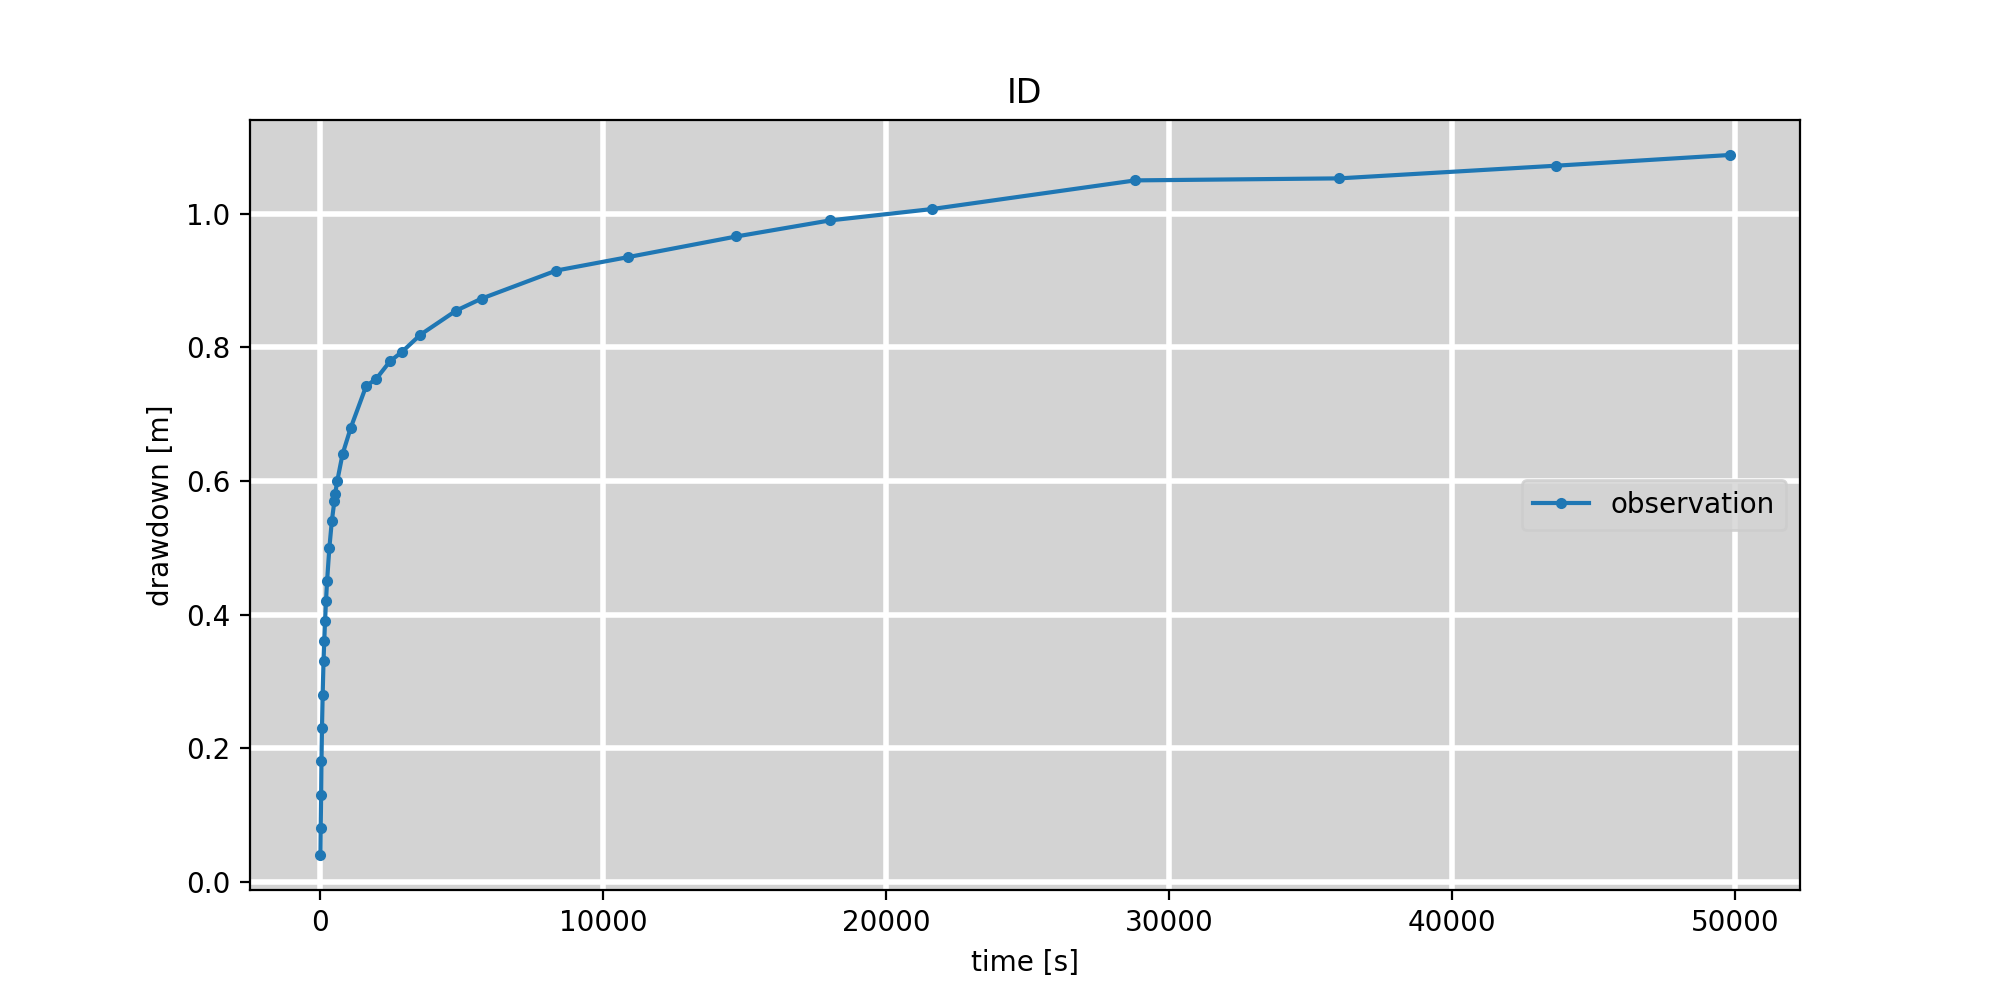

In [8]:
%matplotlib notebook
%matplotlib notebook
#import matplotlib.ticker as ticker
plt.rcParams["figure.figsize"] = (10,5) 
plt.rcParams['axes.facecolor'] = 'lightgray';

def on_wp1_clicked(self): 
    fig = plt.figure(facecolor='w'); ax = plt.gca() #ax = fig.add_subplot()
    #plt.yticks(np.arange(0., 1.0, step = 0.1))
    [tdata,sdata] = uconvert(t1,s1)
    plt.plot (tdata,sdata, '.-', label = 'observation' )
    #ax.set_ylim([0.0,1.0])
    #plt.ylim (0,1.0)
    #locs, labels = plt.yticks(np.arange(0, 1.0, step = 0.1))
    plt.title(wheader.value)
    plt.xlabel('time ['+Tunits.value+']')
    plt.ylabel('drawdown ['+Lunits.value+']')
    #loc = ticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
    #ax.yaxis.set_major_locator(loc)
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.grid(b=True, c='w', lw=2, ls='-')
    plt.legend(loc='center right');
    
wp1 = widgets.Button(description='Plot data')        
wp1.on_click(on_wp1_clicked)   
widgets.VBox([wp1])    

In [9]:
%matplotlib notebook
%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,5) 
plt.rcParams['axes.facecolor'] = 'lightgray';

def on_wp2_clicked(self):
    fig = plt.figure(facecolor='w'); ax = fig.add_subplot()
    ax.set_xscale('log')
    [tdata,sdata] = uconvert(t1,s1)
    plt.plot (tdata,sdata, '.-', label = 'observation' )
    #plt.plot (t1,s1, '.-', label = 'observation' )
    plt.title(wheader.value)
    plt.xlabel('time ['+dataTunits.value+']')
    plt.ylabel('drawdown ['+dataLunits.value+']')
    ax.grid(b=True, c='w', lw=2, ls='-')
    plt.legend(loc = 'upper left');

wp2 = widgets.Button(description='Plot log scale')        
wp2.on_click(on_wp2_clicked)   
widgets.VBox([wp2]) 

In [10]:
%matplotlib notebook
%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,5) 
plt.rcParams['axes.facecolor'] = 'lightgray';

def on_wp3_clicked(self): 
    fig = plt.figure(facecolor='w'); ax = fig.add_subplot()
    ax.set_xscale('log'); ax.set_yscale('log')
    [tdata,sdata] = uconvert(t1,s1)
    plt.plot (tdata,sdata, '.-', label = 'observation' )
    #plt.plot (t1,s1, '.-', label = 'observation' )
    plt.title(wheader.value)
    plt.xlabel('time ['+dataTunits.value+']')
    plt.ylabel('drawdown ['+dataLunits.value+']')
    ax.grid(b=True, c='w', lw=2, ls='-')
    plt.legend(loc = 'lower right');

wp3 = widgets.Button(description='Plot loglog scale')        
wp3.on_click(on_wp3_clicked)   
widgets.VBox([wp3]) 

# Parameter Estimation

Enter initial guesses for $T$ and $S$! The physical unit of transmissivity is derived from the length and time settings above. 

In [11]:
wT = widgets.FloatText(value=5e-3, description='T:', min=1.e-10, disabled=False)
wS = widgets.FloatText(value=1e-4, description='S:', min=1.e-10, disabled=False)
widgets.HBox([wT, wS])

## Evaluation according to Theis

For evaluating the pump test according to the formula of Theis click the button! The well function is computed using the exponential integral from the Python module *scipy.special*. 

In [12]:
from scipy.special import exp1
from scipy.optimize import fmin

def toptim (x):       
    T = x[0]; S = x[1]; D = T/S         # calculate Theis solution
    u = (((wr.value*wr.value)/4)/D)/tdata
    s = wQ.value*exp1(u)/4/np.pi/T
    res = (s-sdata)
    return sum(res*res)                 # function f to be minimized

def on_weval1_clicked(self):            # convert input data
    global tdata,sdata
    [tdata,sdata] = uconvert(t1,s1)
    #tdata = tdatau.to(Tunits.value).magnitude; sdata = sdatau.to(Lunits.value).magnitude
    r = wr.value; ru = r * ureg(Lunits.value); print('Distance between wells: ', end =" "); print(ru)
    Q = wQ.value; Qu = Q * ureg(Lunits.value+'**3/'+Tunits.value); print('Pumping rate: ', end =" "); print(Qu)
    T = wT.value; Tu = T * ureg(Lunits.value+'**2/'+Tunits.value); print('Transmissivity, initial guess: ', end =" ");print(Tu)
    S = wS.value; Su = S * ureg(''); print('Storativity, initial guess: ', end =" "); print(Su)

    # parameter estimation---------------------------------------------------------
    [Tfit,Sfit] = fmin (toptim, [T,S])
    T = Tfit * ureg(Lunits.value+'**2/'+Tunits.value) 
    S = Sfit * ureg('') 

    # post-processing--------------------------------------------------------------   
    D = Tfit/Sfit #print ('Diffusivity = '+ str(D * ureg(Lunits.value+'**2/'+Tunits.value)))
    u = (((r*r)/4)/D)/tdata
    s = Q*exp1(u)/4/np.pi/Tfit
    dev = sdata-s     
    dev2 = dev*dev; res = np.sqrt(sum(dev2)) 
    stde = np.sqrt(dev2.mean())
    sr = 2*dev.std()                            # to compare with hytool !
    fig = plt.figure(facecolor='w'); ax = fig.add_subplot()
    ax.set_xscale('log')
    plt.plot(tdata,sdata,'o',label = 'measured') 
    t = np.logspace(np.log10(tdata.min()),np.log10(tdata.max()),100)
    u = (((r*r)/4)/D)/t
    plt.plot(t,Q*exp1(u)/4/np.pi/Tfit,'-', label = 'modelled', lw = 2)
    plt.xlabel('t ['+Tunits.value+']'); plt.ylabel('s ['+Lunits.value+']')
    plt.title (wheader.value)
    ax.grid(b=True, c='w', lw=2, ls='-')
    plt.legend ()
    xtext = 0.1*tdata.max()
    ax.text (xtext,0.5*s1.max(),'$T =%.3e %s ^2/ %s $' % (Tfit,Lunits.value,Tunits.value))
    ax.text (xtext,0.4*s1.max(),'$S =%.3e $' % (Sfit, ))
    ax.text (xtext,0.3*s1.max(),'$res = %.3e $' % (res, ))
    ax.text (xtext,0.2*s1.max(),'$stdev =%.3e $' % (stde, ));
    ax.text (xtext,0.1*s1.max(),'$2stdev =%.3e $' % (sr, ));
    
weval1 = widgets.Button(description='Evaluate Theis')        
weval1.on_click(on_weval1_clicked)   
widgets.VBox([weval1])    

## Evaluation according to Hantush
For the evaluation according to Hantush enter an initial guess for the semi-permeable layer resistence. Use the time unit specified above.

In [13]:
wc = widgets.FloatText(value=1e8, description='c:', min=1.e-10, disabled=False)
widgets.HBox([wc])

The Hantush well function is computed following Maas & Veling (2010) and Veling & Maas (2010), using the exponential integral from the Python module *scipy.special*. For evaluating the pump test according to the formula of Hantush click the button!

In [14]:
from scipy.special import exp1
from scipy.special import kn as BesselK
from scipy.optimize import fmin  #fmin_l_bfgs_b

def heval (t,r,T,S,c,Q):
    T0  = np.where(T>1.e-10,T,1.e-10) 
    S0  = np.where(S>1.e-10,S,1.e-10)
    c0  = np.where(c>1.e-10,c,1.e-10)
    lamda = np.sqrt(T0*c0)
    rho = r/lamda
    tau = np.log(2*lamda/r*t/(c0*S0))
    s = Q/(4*np.pi*T0)*func_F(rho,tau)
    return s                            # drawdown 

def func_F(rho,tau):
    # func_F is a fast approximation of Hantush well function W
    e = exp1(rho)
    e0 = np.where(e>0,e,1.e-10)
    w = (e0-BesselK(0,rho))/(e0-exp1(rho/2))
    #if tau <= 0:
    F0 = w*exp1(rho/2*np.exp(-tau))-(w-1)*exp1(rho*np.cosh(tau))
    #else:   
    F1 = 2*BesselK(0,rho) - w*exp1(rho/2*np.exp(tau)) + (w-1)*exp1(rho*np.cosh(tau))   
    return (tau<=0)*F0+(tau>0)*F1     

def optim (x):  
    T = x[0]; S = x[1]; c = x[2] 
    s = heval (tdata,wr.value,T,S,c,wQ.value)
    res = (s-sdata)
    return sum(res*res)

def on_weval2_clicked(self):   
    global tdata,sdata
    [tdata,sdata] = uconvert(t1,s1)
    r = wr.value; ru = r * ureg(Lunits.value); print('Distance between wells: ', end =" "); print(ru)
    Q = wQ.value; Qu = Q * ureg(Lunits.value+'**3/'+Tunits.value); print('Pumping rate: ', end =" "); print(Qu)
    T = wT.value; Tu = T * ureg(Lunits.value+'**2/'+Tunits.value); print('Transmissivity, initial guess: ', end =" ");print(Tu)
    S = wS.value; Su = S * ureg(''); print('Storativity, initial guess: ', end =" "); print(Su)
    c = wc.value; cu = c * ureg(Tunits.value); print('Resistence, initial guess: ', end =" "); print(cu)

    # parameter estimation 
    #x = fmin_l_bfgs_b(optim, [T,S,c], approx_grad=1, bounds=((1.e-10, 1.e10), (1.e-10, 1.e10), (1.e-10, 1.e10)))   
    #Tfit = x[0][0]; Sfit = x[0][1]; cfit = x[0][2]
    [Tfit,Sfit,cfit] = fmin (optim, [T,S,c])
    T = Tfit * ureg(Lunits.value+'**2/'+Tunits.value) 
    S = Sfit * ureg('') 
    c = cfit * ureg(Tunits.value)

    # post-processing--------------------------------------------------------------   
    D = T/S #print ('D='+str(D))
    s = heval (tdata,r,Tfit,Sfit,cfit,Q)
    dev = sdata-s                             #sfit-s 
    dev2 = dev*dev; res = np.sqrt(sum(dev2)) 
    stde = np.sqrt(dev2.mean())
    sr = 2*dev.std()                            # to compare with hytool !
    fig = plt.figure(facecolor='w'); ax = fig.add_subplot()
    ax.set_xscale('log')
    plt.plot(tdata,sdata,'o',label = 'measured') 
    t = np.logspace(np.log10(tdata.min()),np.log10(tdata.max()),100)
    plt.plot(t,heval(t,r,Tfit,Sfit,cfit,Q),'-', label = 'modelled', lw = 2)
    plt.xlabel('t ['+Tunits.value+']'); plt.ylabel('s ['+Lunits.value+']')
    plt.title (wheader.value)
    ax.grid(b=True, c='w', lw=2, ls='-')
    plt.legend ()
    xtext = 0.1*tdata.max()
    ax.text (xtext,0.5*s1.max(),'$T =%.3e %s ^2/ %s $' % (Tfit,Lunits.value,Tunits.value))
    ax.text (xtext,0.4*s1.max(),'$S =%.3e $' % (Sfit, ))
    ax.text (xtext,0.3*s1.max(),'$c =%.3e %s $' % (cfit,Tunits.value))
    ax.text (xtext,0.2*s1.max(),'$res = %.3e $' % (res, ))
    ax.text (xtext,0.1*s1.max(),'$stdev = %.3e $' % (stde, ))
    ax.text (xtext,0,'$2stdev =%.3e $' % (sr, ));
    
weval2 = widgets.Button(description='Evaluate Hantush')        
weval2.on_click(on_weval2_clicked)   
widgets.VBox([weval2])

# References

* Hantush M.S., Flow of groundwater in relatively thick leaky aquifers, Water Res. Res., Vol. 3(2), 583-590, 1967
* Hantush M.S., Jacob C.E., Non-steady radial flow in an infinite leaky aquifer, Trans. Am. Geophys. Union, Vol. 36, 95-100, 1955
* Hantush M.S., Analysis of data from pumping tests in leaky aquifers, EOS, Vol. 37(6), 702-714, 1956
* Maas C., Veling E.J.M., Een snelle benadering van de formuke van Hantush, Stromingen, Vol. 6(1), 60-69, 2010
* Veling E.J.M, Maas C., Hantush well function revisited, Journal of Hydrology, Vol. 393(3), 381-388, 2010 
* Theis C.V., The relation between the lowering of the piezometric surface and the rate and duration of discharge of a well using ground-water storage, Groundwater Notes Hydraulics, No. 5, 10p, 1952